In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
emdat_data = pd.read_excel("public_emdat_incl_hist_2024-03-26.xlsx")

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1900-0003-USA,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,30000.0,1055280.0,2.842847,NaN,2004-10-18,2023-10-17
1,1900-0005-USA,Yes,tec-ind-fir-fir,Technological,Industrial accident,Fire (Industrial),Fire (Industrial),NaN,NaN,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,NaN,2003-07-01,2023-09-25
2,1900-0006-JAM,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,JAM,...,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,NaN,2003-07-01,2023-09-25
3,1900-0007-JAM,Yes,nat-bio-epi-vir,Natural,Biological,Epidemic,Viral disease,NaN,Gastroenteritis,JAM,...,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,NaN,2003-07-01,2023-09-25
4,1900-0008-JPN,Yes,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,NaN,NaN,JPN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,NaN,2003-07-01,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26438,2024-0131-BGD,No,tec-mis-fir-fir,Technological,Miscellaneous accident,Fire (Miscellaneous),Fire (Miscellaneous),NaN,Restaurant and building,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-12,2024-03-13
26439,2024-0132-SEN,No,tec-tra-wat-wat,Technological,Transport,Water,Water,NaN,Migrants,SEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-12,2024-03-13
26440,2024-0133-HND,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,HND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-12,2024-03-13
26441,2024-0134-MLI,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,MLI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-12,2024-03-13


<Axes: xlabel='count', ylabel='Disaster Subgroup'>

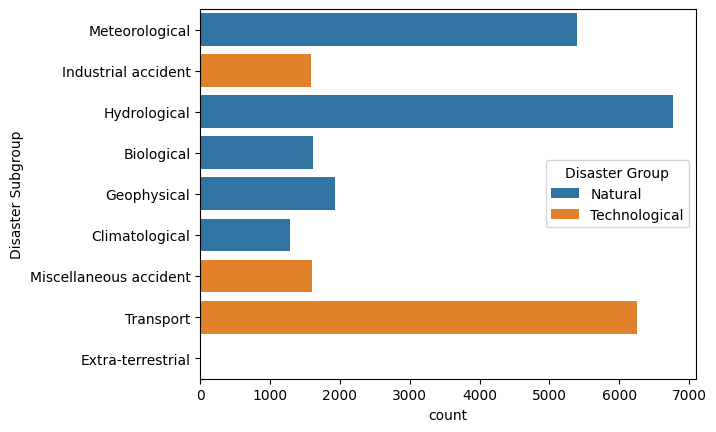

In [15]:
sns.countplot(emdat_data, y="Disaster Subgroup", hue="Disaster Group")

In [18]:
emdat_data[emdat_data["Disaster Subgroup"] == "Extra-terrestrial"]

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
20315,2013-0060-RUS,No,nat-ext-imp-col,Natural,Extra-terrestrial,Impact,Collision,NaN,NaN,RUS,...,NaN,NaN,NaN,NaN,33000.0,41457.0,79.601309,"[{""adm1_code"":2499,""adm1_name"":""Chelyabinskaya...",2014-03-21,2024-02-06


In [21]:
emdat_data["Magnitude Scale"].unique(
)

array(['Kph', 'm3', 'Km2', 'Vaccinated', nan, 'Richter', '°C'],
      dtype=object)